In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
#carico il csv nel dataframe
df = pd.read_csv('fabbisogno calorico.csv')
df.head()

,Unnamed: 0,eta,calorie
0,0,35,2006
1,1,54,2476
2,2,26,2532
3,3,49,2165
4,4,30,2584


In [4]:
#X è la nostra variabile indipendente (matrice delle caratteristiche), deve essere un array 2D per scikit-learn
X = df['eta'].values[:, np.newaxis]
X.shape

(10000, 1)

In [5]:
#y è la nostra variabile dipendente (ciò che vogliamo prevedere)
y = df['calorie']
y

0       2006
1       2476
2       2532
3       2165
4       2584
        ... 
9995    2087
9996    2587
9997    2471
9998    2360
9999    2313
Name: calorie, Length: 10000, dtype: int64

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) #separo il df in 80% per il training e 20% per il test (di default è 0.25)
X_train

array([[17],
       [49],
       [70],
       ...,
       [28],
       [37],
       [30]], shape=(8000, 1))

In [7]:
X_test

array([[38],
       [60],
       [69],
       ...,
       [43],
       [38],
       [36]], shape=(2000, 1))

In [8]:
y_test

6252    2248
4684    2060
1731    1975
4742    2422
4521    2080
        ... 
6412    2116
8285    2301
7853    2240
1095    2531
6929    2180
Name: calorie, Length: 2000, dtype: int64

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
print(f"Intercetta: {model.intercept_:.2f}") #valore di y quando la X è zero
print(f"Coefficiente: {model.coef_[0]:.2f}") #pendenza

Intercetta: 2781.07
Coefficiente: -10.94


In [11]:
y_pred = model.predict(X_test)
y_pred

array([2365.43115826, 2124.80041147, 2026.36056051, ..., 2310.74235217,
       2365.43115826, 2387.3066807 ], shape=(2000,))

In [12]:
for real, pred in zip(y_test[:5], y_pred[:5]): #mi crea una lista di tuple iterabili
    print(f"Test reale: {real:.2f} - Test Predetto: {pred:.2f}")

Test reale: 2248.00 - Test Predetto: 2365.43
Test reale: 2060.00 - Test Predetto: 2124.80
Test reale: 1975.00 - Test Predetto: 2026.36
Test reale: 2422.00 - Test Predetto: 2201.36
Test reale: 2080.00 - Test Predetto: 2070.11


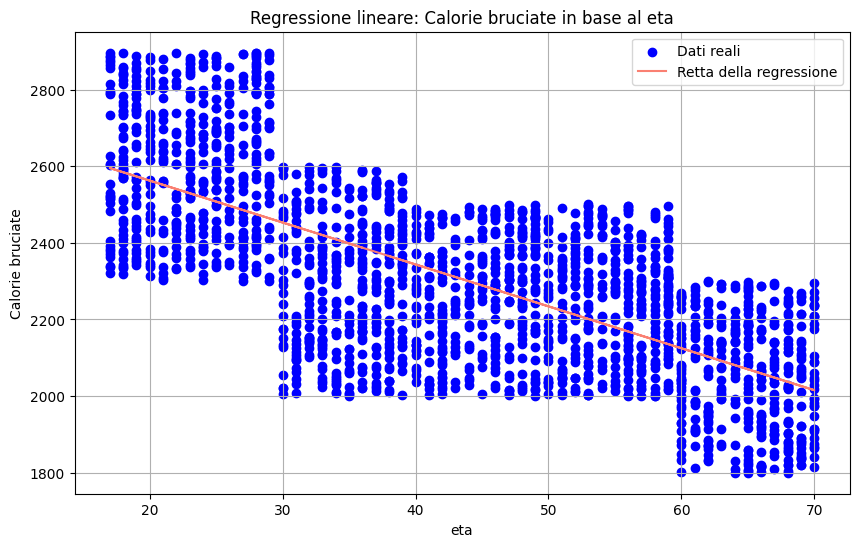

In [14]:
plt.figure(figsize =(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Dati reali')
plt.plot(X_test, y_pred, color='salmon', label='Retta della regressione')
plt.xlabel('eta')
plt.ylabel('Calorie bruciate')
plt.title('Regressione lineare: Calorie bruciate in base al eta')
plt.legend()
plt.grid(True)
plt.show()

30524.54820812352
0.49114950903850385


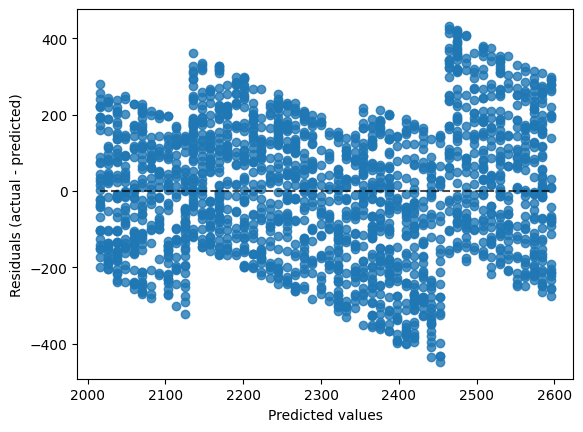

In [15]:
from sklearn.metrics import mean_squared_error, r2_score, PredictionErrorDisplay

print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

display = PredictionErrorDisplay(y_true = y_test, y_pred = y_pred)
display.plot()
plt.show()